# PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

1-Detección y eliminación de Outliers

2-Encoding

3-Imputación de valores faltantes

4-Escalado de datos

5-Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado . Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

In [1]:
#Importe de librerías:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import pandas_profiling
from sklearn import preprocessing
from sklearn import model_selection, metrics
import missingno as msno
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb
import multiprocessing
import sys
import xgboost
import xgboost as xgb

In [2]:
#Primero importo la base de datos
df=pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
#A MI DATASET, LO VOY A FILTRAR CAPITAL FEDERAL Y POR LOS TIPOS DE PROPIEDAD CASA, DEPARTAMENTO Y PH
tipo_propiedad= df.loc[ (df.property_type=="PH")|(df.property_type=="Departamento")|(df.property_type=="Casa") ]
tipo_region=tipo_propiedad.loc[(tipo_propiedad.l2=="Capital Federal")]
columnas=tipo_region.iloc[:, [8,9,10,11,12,13,17]]
columnas.head()
#columnas.shape

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH


# VALORES FALTANTES

<AxesSubplot:>

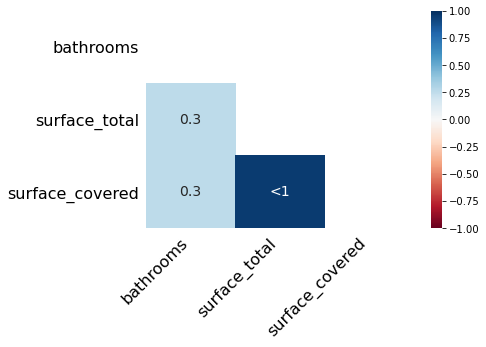

In [4]:
msno.heatmap(columnas,figsize=(6,4))

<AxesSubplot:>

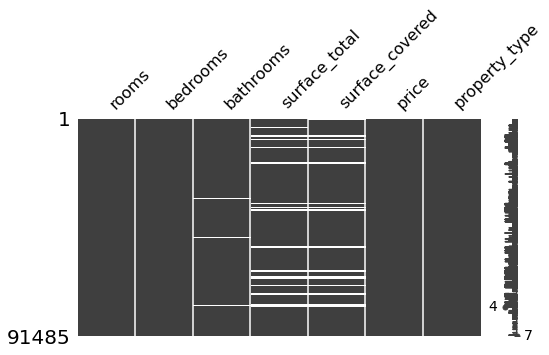

In [5]:
msno.matrix(columnas,figsize=(8,4))

In [6]:
#ANALIZO LOS VALORES FALTANTES
columnas.isnull().sum()

rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64

In [7]:
#ANALIZO LA MEDIA DE LOS BAÑOS, SEGÚN LOS TIPOS DE PROPIEDAD
mean_bathrooms=columnas[["property_type","bathrooms"]].groupby("property_type").agg(pd.Series.mode)
mean_bathrooms.to_dict()

{'bathrooms': {'Casa': 2.0, 'Departamento': 1.0, 'PH': 1.0}}

In [8]:
columnas=columnas.set_index("property_type")
columnas.bathrooms.fillna(mean_bathrooms.to_dict()["bathrooms"],inplace=True)
columnas.reset_index(inplace=True)

In [9]:
columnas.shape

(91485, 7)

In [10]:
columnas.surface_total.fillna(columnas.surface_total.median(), inplace = True)
columnas.surface_covered.fillna(columnas.surface_covered.median(), inplace = True)

In [11]:
#CORROBORO QUE NO TENGA VALORES FALTANTES
columnas.isnull().sum()

property_type      0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

# DETECCION DE OUTLIERS

In [12]:
columnas.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,91485.000000,91485.000000,91485.000000,9.148500e+04
mean,2.964278,1.960278,1.548451,108.569066,91.739455,2.595003e+05
std,1.314704,1.072946,0.854216,931.774958,738.238711,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,51.000000,46.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,104.000000,90.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [13]:
columnas.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,91485.000000,91485.000000,91485.000000,9.148500e+04
mean,2.964278,1.960278,1.548451,108.569066,91.739455,2.595003e+05
std,1.314704,1.072946,0.854216,931.774958,738.238711,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,51.000000,46.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,104.000000,90.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [14]:
columnas.shape

(91485, 7)

In [15]:
#OTRA FORMA DE SACAR LOS OUTLIERS DE CADA VARIABLE, SIN TENER QUE HACER LOS GRÁFICOS

# q25,q75 = np.percentile(columnas.surface_covered.values, [25,75])
# iqr = q75 - q25
# minimo = q25 - 1.5*iqr
# maximo = q75 + 1.5*iqr
# print(q25,q75,iqr, minimo, maximo)

Text(0, 0.5, 'ESPACIOS')

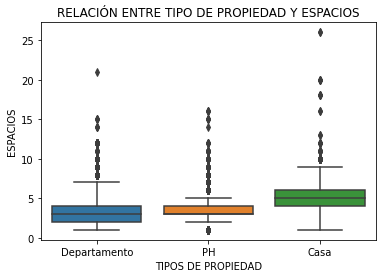

In [16]:
#Este gráfico muestra la cantidad de rooms según los tipos de propiedad
sns.boxplot(data=columnas, x="property_type", y="rooms")
plt.title("RELACIÓN ENTRE TIPO DE PROPIEDAD Y ESPACIOS")
plt.xlabel("TIPOS DE PROPIEDAD")
plt.ylabel("ESPACIOS")

Text(0, 0.5, 'HABITACIONES')

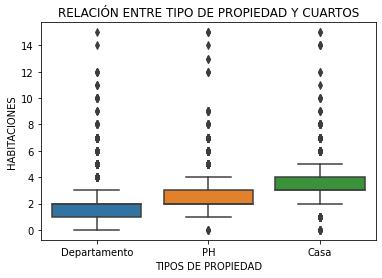

In [17]:
#Este gráfico muestra la cantidad de bedrooms según los tipos de propiedad
sns.boxplot(data=columnas, x="property_type", y="bedrooms")
plt.title("RELACIÓN ENTRE TIPO DE PROPIEDAD Y CUARTOS")
plt.xlabel("TIPOS DE PROPIEDAD")
plt.ylabel("HABITACIONES")

Text(0, 0.5, 'BAÑOS')

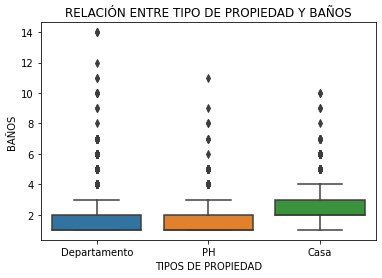

In [18]:
#Ahora analizaremos la variable bathrooms, para determinar si tenemos o no ouliers
sns.boxplot(data=columnas, x="property_type", y="bathrooms")
plt.title("RELACIÓN ENTRE TIPO DE PROPIEDAD Y BAÑOS")
plt.xlabel("TIPOS DE PROPIEDAD")
plt.ylabel("BAÑOS")

Text(0, 0.5, 'SUPERFICIE TOTAL')

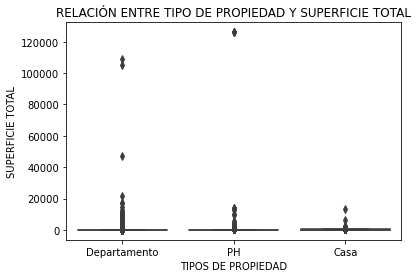

In [19]:
#Ahora analizaremos la variable surface total, para determinar si tenemos o no ouliers
sns.boxplot(data=columnas, x="property_type", y="surface_total")
plt.title("RELACIÓN ENTRE TIPO DE PROPIEDAD Y SUPERFICIE TOTAL")
plt.xlabel("TIPOS DE PROPIEDAD")
plt.ylabel("SUPERFICIE TOTAL")

Text(0, 0.5, 'SUPERFICIE CUBIERTA')

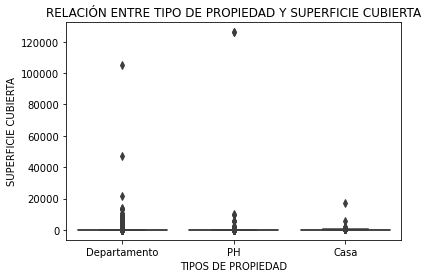

In [20]:
#Por último analizaremos la variable surface_covered, para determinar si tenemos
sns.boxplot(data=columnas, x="property_type", y="surface_covered")
plt.title("RELACIÓN ENTRE TIPO DE PROPIEDAD Y SUPERFICIE CUBIERTA")
plt.xlabel("TIPOS DE PROPIEDAD")
plt.ylabel("SUPERFICIE CUBIERTA")

A partir de estos gráficos, vamos a realizar el filtrado de las variables

In [21]:
#Filtraremos las propiedades de la siguiente manera:
filtrado_1=columnas.loc[columnas["rooms"]<7]
filtrado_2=filtrado_1.loc[filtrado_1["bedrooms"]<6]
filtrado_3=filtrado_2.loc[filtrado_2["bathrooms"]<4]
filtrado_4=filtrado_3.loc[filtrado_3["surface_total"]<186]
filtrado_5=filtrado_4.loc[filtrado_4["surface_covered"]<158.5]

In [22]:
filtrado_5

,property_type,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,PH,2.0,1.0,2.0,70.0,58.0,159000.0
2,PH,2.0,1.0,1.0,45.0,45.0,125000.0
3,PH,2.0,1.0,1.0,85.0,50.0,295000.0
4,PH,2.0,1.0,1.0,56.0,56.0,150000.0
5,PH,2.0,1.0,1.0,70.0,70.0,159500.0
...,...,...,...,...,...,...,...
91478,Departamento,4.0,2.0,3.0,159.0,98.0,539000.0
91479,Departamento,4.0,3.0,2.0,106.0,100.0,620000.0
91480,PH,4.0,3.0,3.0,175.0,111.0,570000.0
91481,PH,3.0,2.0,2.0,144.0,134.0,480000.0


# ENCODING --> ONE HOT ENCODING

In [23]:
filtrado_5.value_counts("property_type")

property_type
Departamento    72372
PH               7752
Casa              979
dtype: int64

In [24]:
ohe=pd.get_dummies(filtrado_5["property_type"])
filtrado_5=pd.concat([filtrado_5,ohe],axis=1)
filtrado_5=filtrado_5.drop(["property_type"],axis=1)

In [25]:
filtrado_5

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,PH
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
4,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1
5,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,1
...,...,...,...,...,...,...,...,...,...
91478,4.0,2.0,3.0,159.0,98.0,539000.0,0,1,0
91479,4.0,3.0,2.0,106.0,100.0,620000.0,0,1,0
91480,4.0,3.0,3.0,175.0,111.0,570000.0,0,0,1
91481,3.0,2.0,2.0,144.0,134.0,480000.0,0,0,1


# ESCALADO DE DATOS

In [26]:
base_ml=filtrado_5.copy()

In [27]:
columnas=["rooms","bedrooms","bathrooms","surface_total","surface_covered"]

for col in columnas:
    scl=preprocessing.StandardScaler()
    X=scl.fit_transform(base_ml[col].values.reshape(-1,1))
    base_ml[col]=X

In [28]:
y=base_ml["price"]
X=base_ml.drop("price",axis=1)

In [29]:
base_ml.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,PH
rooms,1.000000,0.940225,0.523154,0.692981,0.728982,0.490101,0.132726,-0.210977,0.173108
bedrooms,0.940225,1.000000,0.523786,0.665700,0.704852,0.477547,0.133084,-0.203659,0.165260
bathrooms,0.523154,0.523786,1.000000,0.570297,0.597448,0.587790,0.073394,-0.028060,0.002320
surface_total,0.692981,0.665700,0.570297,1.000000,0.917719,0.624370,0.125044,-0.245250,0.212090
surface_covered,0.728982,0.704852,0.597448,0.917719,1.000000,0.646453,0.103982,-0.184963,0.156360
price,0.490101,0.477547,0.587790,0.624370,0.646453,1.000000,0.057052,0.005596,-0.027090
Casa,0.132726,0.133084,0.073394,0.125044,0.103982,0.057052,1.000000,-0.318246,-0.035935
Departamento,-0.210977,-0.203659,-0.028060,-0.245250,-0.184963,0.005596,-0.318246,1.000000,-0.935960
PH,0.173108,0.165260,0.002320,0.212090,0.156360,-0.027090,-0.035935,-0.935960,1.000000


In [30]:
# plt.figure(figsize=(8,8))
# sns.heatmap(base_ml, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
#            xticklabels= base_ml.columns, 
#            yticklabels= base_ml.columns,
#             cmap= 'coolwarm')
# plt.show()

# ENTRENAMIENTO DE MODELO 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56772, 8) (56772,) (24331, 8) (24331,)


In [32]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor()
knn_regressor = KNeighborsRegressor()

In [33]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 92438.24081560584
Raíz del error cuadrático medio en Test: 96586.12991382055


C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


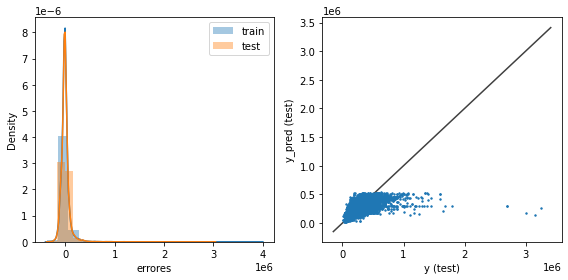

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 57228.60745298094
Raíz del error cuadrático medio en Test: 82518.98857628624


C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


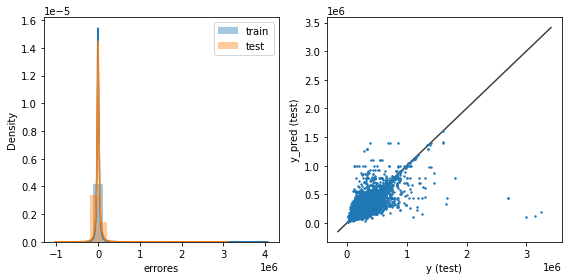

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 70181.52109863832
Raíz del error cuadrático medio en Test: 83244.15071650055


C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


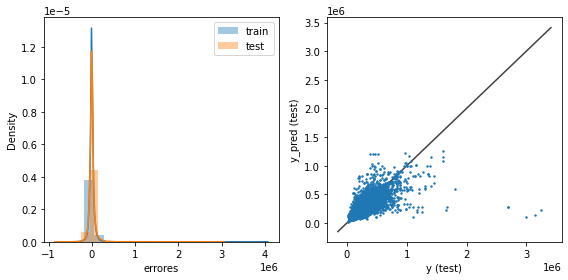

In [34]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [67]:
coeff_df = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
rooms,1.388889e+02
bedrooms,-9.292628e+02
bathrooms,3.786774e+04
surface_total,2.872032e+04
surface_covered,4.012798e+04
Casa,-2.129294e+15
Departamento,-2.129294e+15
PH,-2.129294e+15


# MODELO AVANZADO 1 - REGRESIÓN LINEAL (POLYNOMIAL FEATURES Y REGULARIZACION)

In [35]:
#PRIMERO ENTRENAREMOS UN MODELO DE REGRESIÓN LINEAL, CON ATRIBUTOS POLINÓMICOS.

poly = PolynomialFeatures()

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

reg_poly = LinearRegression()

reg_poly.fit(X_train_poly,y_train)

y_train_pred_poly = reg_poly.predict(X_train_poly)
y_test_pred_poly = reg_poly.predict(X_test_poly)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 88263.79656938594
Raíz del error cuadrático medio en Test: 92605.38014237175


In [36]:
#VAMOS A HACER LO MISMO QUE HICIMOS MÁS ARRIBA PERO CON OTRO GRADO POLINOMICO PARA VER SI MEJORA NUESTRO MODELO
#RECORDEMOS QUE LA MÉTRICA ES EL ERROR CUADRADO MEDIO NEGATIVO.

In [37]:
poly3 = PolynomialFeatures(3)

X_train_poly_3 = poly3.fit_transform(X_train)
X_test_poly_3 = poly3.fit_transform(X_test)

reg_poly3 = LinearRegression()

reg_poly3.fit(X_train_poly_3,y_train)

y_train_pred_poly_3 = reg_poly3.predict(X_train_poly_3)
y_test_pred_poly_3 = reg_poly3.predict(X_test_poly_3)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_poly_3))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_poly_3))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 85052.09542686063
Raíz del error cuadrático medio en Test: 90147.35590055295


In [38]:
poly4 = PolynomialFeatures(4)

X_train_poly_4 = poly4.fit_transform(X_train)
X_test_poly_4 = poly4.fit_transform(X_test)

reg_poly4 = LinearRegression()

reg_poly4.fit(X_train_poly_4,y_train)

y_train_pred_poly_4 = reg_poly4.predict(X_train_poly_4)
y_test_pred_poly_4 = reg_poly4.predict(X_test_poly_4)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_poly_4))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_poly_4))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 83414.98327957295
Raíz del error cuadrático medio en Test: 89073.22306635245


In [39]:
#TAMBIÉN PODRIAMOS CREAR UNA VARIABLE QUE AL CAMBIAR EL NUMERO DE LOS POLINOMIOS, ME DETERMINE EL ERROR.

poly_num=5

poly_num = PolynomialFeatures(degree=poly_num)

X_train_poly_num = poly_num.fit_transform(X_train)
X_test_poly_num = poly_num.fit_transform(X_test)

reg_poly_num = LinearRegression()

reg_poly_num.fit(X_train_poly_num,y_train)

y_train_pred_poly_num = reg_poly_num.predict(X_train_poly_num)
y_test_pred_poly_num = reg_poly_num.predict(X_test_poly_num)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_poly_num))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_poly_num))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 83005.09720695268
Raíz del error cuadrático medio en Test: 194614031417799.97


In [40]:
#VEMOS QUE NUESTRO MEJOR MODELO HASTA EL MOMENTO, ES CON ATRIBUTOS POLINÓMICO DE GRADO 4 CON UN ERROR DE 89073.22
#AHORA REALIZAREMOS VALIDACIÓN CRUZADA TANTO CON REGULARIZACIÓN RIDGE Y LASSO PARA VER SI NUESTRO MODELO MEJORA

In [41]:
reg_ridge = Ridge() #EL VALOR POR DEFECTO DE ALFA ES DE 1.0

ridgecv= cross_val_score(reg_ridge, X_train_poly_4, y_train,  scoring   = 'neg_root_mean_squared_error', cv=5)

print(ridgecv*-1,ridgecv.mean()*-1)

[80878.04803948 82740.17848632 96855.84014194 79179.32847726
 82722.52982123] 84475.18499324813


In [42]:
reg_num=10

reg_ridge_num = Ridge(alpha=reg_num) #UN ALFA GRANDE, FUERZA A QUE LOS COEFICIENTES SEAN CERCANOS A 0

ridgecv_num= cross_val_score(reg_ridge_num, X_train_poly_4, y_train,  scoring   = 'neg_root_mean_squared_error', cv=5)

print(ridgecv_num*-1,ridgecv_num.mean()*-1)

[80683.34905675 82333.31220014 96783.68290947 79117.74861302
 82633.00722456] 84310.22000078877


In [43]:
reg_lasso=Lasso() #EL VALOR POR DEFECTO DE ALFA ES DE 1.0 Y DE N_ITER ES DE 1000

lassocv=cross_val_score(reg_lasso, X_train_poly_4, y_train, scoring   = 'neg_root_mean_squared_error', cv=5)

print(lassocv*-1,lassocv.mean()*-1)

C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160390130958663.1, tolerance: 78762768963.45775
  model = cd_fast.enet_coordinate_descent(
C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158999988569193.44, tolerance: 78424785584.96384
  model = cd_fast.enet_coordinate_descent(
C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144015082421095.94, tolerance: 76343828170.41612
  model = cd_fast.enet_coordinate_descent(
C:\Users\54351\Miniconda3\envs\datascience\lib\site-p

[80665.38309177 83304.33488078 96898.06430975 79285.51632129
 82323.00423206] 84495.26056713043


C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159067448577862.38, tolerance: 78645878995.01898
  model = cd_fast.enet_coordinate_descent(


In [44]:
alpha_num=0.001

reg_lasso_num=Lasso(alpha=alpha_num) #Con una max_iter de 2000, el modelo tampoco mejora mucho y demora, por eso no lo pongo

lassocv_num=cross_val_score(reg_lasso_num, X_train_poly_4, y_train,  scoring   = 'neg_root_mean_squared_error', cv=5)

print(lassocv_num*-1,lassocv_num.mean()*-1)

C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161393728909316.22, tolerance: 78762768963.45775
  model = cd_fast.enet_coordinate_descent(
C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160451254801163.2, tolerance: 78424785584.96384
  model = cd_fast.enet_coordinate_descent(
C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145276434698124.9, tolerance: 76343828170.41612
  model = cd_fast.enet_coordinate_descent(
C:\Users\54351\Miniconda3\envs\datascience\lib\site-pa

[80717.03969257 83330.04925602 96904.81284589 79286.76726382
 82334.64485345] 84514.66278235088


C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159996511138412.06, tolerance: 78645878995.01898
  model = cd_fast.enet_coordinate_descent(


# RANDOM FOREST

In [74]:
#AHORA PROBAREMOS Y EVALUAREMOS CON UN SEGUNDO MODELO, RANDOM FOREST, CON SUS VALORES POR DEFECTO Y LUEGO BUSCAREMOS 
#MEDIANTE GRID SEARCH, CUÁLES SON LOS MEJORES HIPERMPARÁMETROS.

rf=RandomForestRegressor()

rf.fit(X_train,y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 58819.362316567735
Raíz del error cuadrático medio en Test: 78279.09310604661


C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


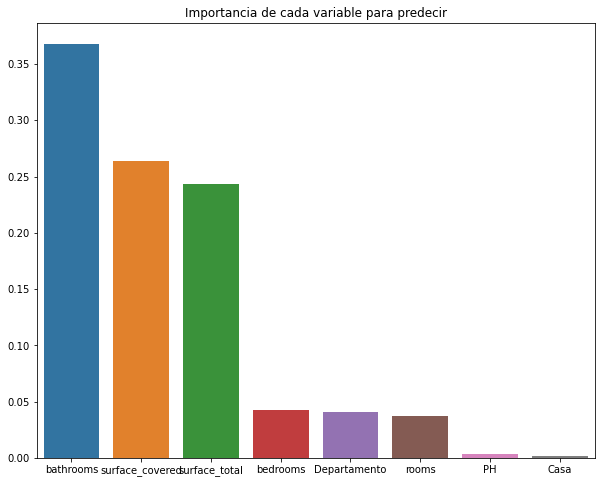

In [80]:
importances = rf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]


plt.figure(figsize = (10,8))
sns.barplot(columns[indices], importances[indices])
plt.title("Importancia de cada variable para predecir")
plt.show()

In [68]:
#DEFINIMOS LOS HIPERPARÁMETROS QUE QUEREMOS QUE EL MODELO BUSQUE

param_dist =  {"max_features": np.arange(0,9),
              "n_estimators": np.arange(100,150, 10)}

In [69]:
model = RandomizedSearchCV(rf, param_dist, scoring= 'neg_root_mean_squared_error', cv=5)

model.fit(X_train, y_train)

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

# scores = pd.DataFrame(model.cv_results_)
# scores.head()

C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\54351\Miniconda3\envs\datascience\lib\site-

C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\54351\Miniconda3\envs\datascience\lib\site-

Mejores parametros: {'n_estimators': 120, 'max_features': 2}
Mejor Score: -71860.2103652217



In [49]:
rf=RandomForestRegressor(n_estimators=130,max_features=3)

rfcv= cross_val_score(rf, X_train, y_train,  scoring   = 'neg_root_mean_squared_error', cv=5)

print(rfcv*-1,rfcv.mean()*-1)

[67228.92063296 69590.0303491  87022.99133441 65727.57052251
 70144.36625939] 71942.775819674


# SVM

Se podría agregar este modelo de regresión de soporte vectorial, pero no tiene una buena performance (El error está cerca de los $135.228,40), y los recursos requeridos para "correr" el modelo son altos.

In [50]:
# svr=SVR()

# svr.fit(X_train,y_train)

# y_train_pred = svr.predict(X_train)
# y_test_pred = svr.predict(X_test)

# rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
# print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

In [51]:
# param_grid =  {"gamma": np.arange(0.001,0.1,3),
#                 "C": np.arange(0.001,0.1,3),
#                "kernel":["poly","rbf","sigmoid"]}

In [52]:
# svr=SVR()

# model2 = GridSearchCV(svr, param_grid=param_grid, cv=5)

In [53]:
# svr.get_params()

In [54]:
# model2.fit(X_train, y_train)

In [55]:
# print("Mejores parametros: "+str(model2.best_params_))
# print("Mejor Score: "+str(model2.best_score_)+'\n')

# scores = pd.DataFrame(model2.cv_results_)
# scores.head()

In [56]:
# svr=SVR(kernel="rbf",C=0.001,gamma=0.001)
# svr.fit(X_train,y_train)

# y_train_pred = svr.predict(X_train)
# y_test_pred = svr.predict(X_test)
    
# rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
# rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
# print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

# XGBOOST

In [82]:
xg_reg = xgb.XGBRegressor()

xg_reg.fit(X_train,y_train)

preds=xg_reg.predict(X_test)

y_train_pred = xg_reg.predict(X_train)
y_test_pred = xg_reg.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 68877.87740458339
Raíz del error cuadrático medio en Test: 80142.2393708537


C:\Users\54351\Miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


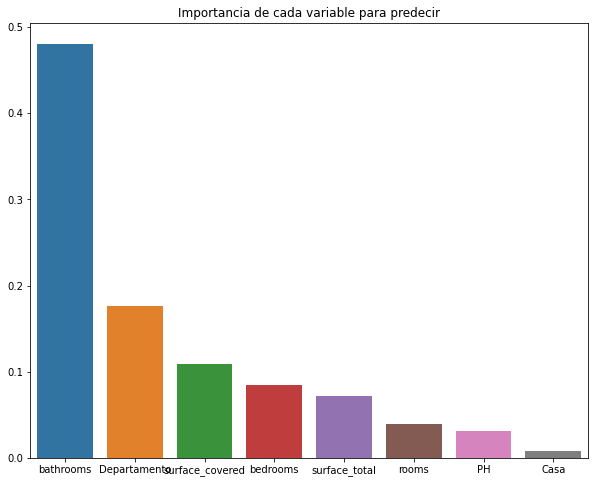

In [83]:
importances = xg_reg.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (10,8))
sns.barplot(columns[indices], importances[indices])
plt.title("Importancia de cada variable para predecir")
plt.show()

In [59]:
param_dist =  {"learning_rate": np.arange(0,1,0.2),
              "n_estimators": np.arange(100,150, 10),
              "alpha": np.arange(1,10,2)}

In [60]:
model = RandomizedSearchCV(xg_reg, param_dist, scoring= 'neg_root_mean_squared_error', cv=5)

model.fit(X_train, y_train)

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'n_estimators': 140, 'learning_rate': 0.4, 'alpha': 1}
Mejor Score: -74257.83612411314



In [61]:
xg_reg = xgb.XGBRegressor(n_estimators=140,learning_rate=0.4,alpha=1)

xg_reg= cross_val_score(xg_reg, X_train, y_train,  scoring   = 'neg_root_mean_squared_error', cv=5)

print(xg_reg*-1,xg_reg.mean()*-1)

[68979.17233713 71660.20147055 89194.61424884 68400.41761208
 73062.3718132 ] 74259.35549635907


# COMPARACIÓN DE MODELOS EVALUADOS

In [72]:
# Dataframe with the results of models
modelos = {'Models': [ridgecv_num.mean()*-1, rfcv.mean()*-1, xg_reg.mean()*-1]}

modelos_df = pd.DataFrame(modelos, index=["Ridge regression","Random Forest" ,"XG Boost"])
modelos_df

,Models
Ridge regression,84310.220001
Random Forest,71942.775820
XG Boost,74259.355496


Text(0, 0.5, 'RMSE')

<Figure size 3600x3600 with 0 Axes>

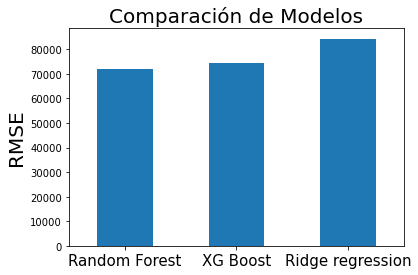

In [63]:
plt.figure(figsize=(50,50))
modelos_df.sort_values(by='Models').plot.bar(legend=None)
plt.xticks(rotation=0, fontsize=15)
plt.title('Comparación de Modelos', fontsize=20)
plt.ylabel('RMSE' , fontsize=20)

# PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

PARTE C - Interpretación de modelos

1.Debes estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

1.Es muy importante que analices los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?

1.Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías? Ten en cuenta siempre terminar con una discusión sobre lo realizado y conclusiones obtenidas.

# CONCLUSIONES

En base a los resultados, el proyecto mejoró bastante en comparación con el trabajo anterior cuyo error era de $150011.0530 con la métrica RMSE.

En este segundo proyecto, con modelos avanzados como Random Forest, XGBOOST y SVM y nuevas herramientas como Random Search ó Validación Cruzada se pudo reducir a menos de la mitad el RMSE. 

El modelo con mejor performance, fue Random Forest con Validación Cruzada , con un RMSE en test de $71942.77.

Era de esperarse un error alto, ya que hay variables que no se incluyen en el dataser, como por ejemplo las calles importantes o las cercanías de parques, shoppings, subtes, etc. 

Por otro lado en lo particular, decidí no incluir variables como latitud y longitud, ya que considero que al rellenar los valores faltantes, por valores como la mediana no representa la realidad.